# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
from citipy import citipy
import scipy.stats 
# Import API key
#from api_keys import api_key

temp_units = "imperial"


# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url =f"http://api.openweathermap.org/data/2.5/weather?appid=9a20696ecb0ed542aab981dfd90b4c11"

# define count of pass throughs
count_one = 0
set_one = 1


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = "113abbe43908103b8bc78cd7217a7523"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint Paul Harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kodiak
Processing Record 2 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=upernavik
Processing Record 3 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=tuktoyaktuk
Processing Record 4 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=jamestown
Processing Record 5 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=qaanaaq
Processing Record 6 | Wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=wilmington
Processing Record 7 | Tazovsky
http://api.openweathermap.org/data/

Processing Record 57 | Pascagoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=pascagoula
Processing Record 58 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=barrow
Processing Record 59 | Contamana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=contamana
City not found. Skipping...
Processing Record 60 | Somerset
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=somerset
Processing Record 61 | Berbera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=berbera
Processing Record 62 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=thompson
Processing Record 63 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abb

Processing Record 112 | Polson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=polson
Processing Record 113 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=bethel
Processing Record 114 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=beringovskiy
Processing Record 115 | Whitianga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=whitianga
Processing Record 116 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=zhangye
Processing Record 117 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=auki
Processing Record 118 | Mitú
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=mitu
P

Processing Record 169 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kavieng
Processing Record 170 | At-Bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=at-bashi
Processing Record 171 | Chuguyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=chuguyevka
Processing Record 172 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=christchurch
Processing Record 173 | São Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=sao filipe
Processing Record 174 | Homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=homer
Processing Record 175 | Novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78

Processing Record 225 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=atar
Processing Record 226 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=pitimbu
Processing Record 227 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=anadyr
Processing Record 228 | Escanaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=escanaba
Processing Record 229 | Atasū
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=atasu
Processing Record 230 | Shingū
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=shingu
Processing Record 231 | Talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=talara
Processing Re

Processing Record 281 | Mlonggo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=mlonggo
Processing Record 282 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=hobyo
Processing Record 283 | Yaransk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=yaransk
Processing Record 284 | Qūchān
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=quchan
Processing Record 285 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=lompoc
Processing Record 286 | Severnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=severnyy
Processing Record 287 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=gat
Proces

Processing Record 337 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kavaratti
Processing Record 338 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=abu samrah
Processing Record 339 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=sorong
Processing Record 340 | Abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=abalak
Processing Record 341 | Kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kidal
Processing Record 342 | Mizdah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=mizdah
Processing Record 343 | Herat Province
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=

Processing Record 393 | Ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=ugoofaaru
Processing Record 394 | Mahina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=mahina
Processing Record 395 | Uspenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=uspenka
City not found. Skipping...
Processing Record 396 | Esim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=axim
Processing Record 397 | Guider
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=guider
Processing Record 398 | Kadipaten
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kadipaten
City not found. Skipping...
Processing Record 399 | Kaoma
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 448 | Menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=menongue
Processing Record 449 | Diré
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=dire
Processing Record 450 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=arlit
Processing Record 451 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=verkhnevilyuysk
Processing Record 452 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=bonavista
Processing Record 453 | Kyzyl-Suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=pokrovka
Processing Record 454 | Trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a

Processing Record 505 | Kolokani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=kolokani
Processing Record 506 | Khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=khandyga
City not found. Skipping...
City not found. Skipping...
Processing Record 507 | Golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=golden
City not found. Skipping...
Processing Record 508 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=vostok
Processing Record 509 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=nemuro
Processing Record 510 | Tahoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=113abbe43908103b8bc78cd7217a7523&q=tahoua
Processing Record 511 | Humaitá
http://api.openweathermap.org/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [8]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,81,US,1635073931,91,57.7900,-152.4072,43.12,14.12
1,Upernavik,100,GL,1635073933,73,72.7868,-56.1549,17.35,12.35
2,Tuktoyaktuk,69,CA,1635073935,95,69.4541,-133.0374,21.40,5.79
3,Jamestown,90,US,1635073936,99,42.0970,-79.2353,45.99,1.01
4,Qaanaaq,0,GL,1635073938,59,77.4840,-69.3632,-0.09,8.95


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#check if any city has higher than 100% humidity
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.000000,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,54.892139,1.635074e+09,69.906764,19.423155,19.800837,61.140713,8.230329
std,38.997009,3.014982e+02,22.215406,33.551397,89.572817,22.076929,5.319700
min,0.000000,1.635074e+09,7.000000,-54.800000,-175.200000,-17.050000,0.000000
25%,12.000000,1.635074e+09,60.000000,-9.059150,-58.693500,47.335000,4.000000
50%,68.000000,1.635074e+09,75.000000,22.285500,22.818400,63.540000,7.200000
75%,92.000000,1.635075e+09,87.000000,48.042650,99.012500,79.445000,11.645000
max,100.000000,1.635075e+09,100.000000,78.218600,179.316700,102.760000,23.310000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

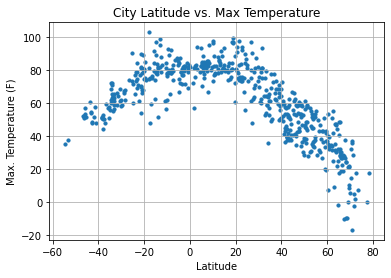

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

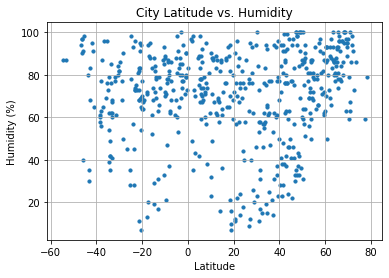

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

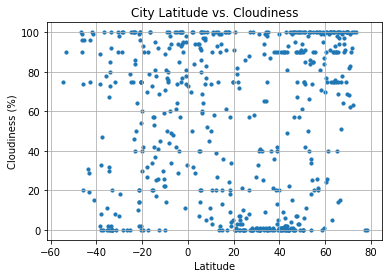

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

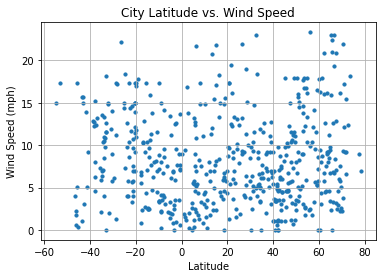

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#linear regression by hemisphere

#create northern and southern df
north_hemi_df = weather_data.loc[(weather_data['Lat']>0)]
south_hemi_df = weather_data.loc[(weather_data['Lat'] < 0)]

In [17]:
north_hemi_df.count()

City          369
Cloudiness    369
Country       369
Date          369
Humidity      369
Lat           369
Lng           369
Max Temp      369
Wind Speed    369
dtype: int64

In [18]:
 south_hemi_df.count()

City          178
Cloudiness    178
Country       178
Date          178
Humidity      178
Lat           178
Lng           178
Max Temp      178
Wind Speed    178
dtype: int64

In [31]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

r-squared: -0.8778940049765651


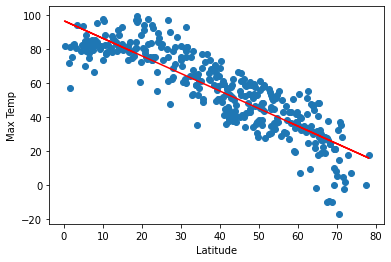

<Figure size 432x288 with 0 Axes>

In [32]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("NH_temp_vs_lat.png")